# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Lisa Amatul Sahibah
- Email: amatullisa@gmail.com
- Id Dicoding: lisaas

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berubah seiring waktu?
- Apakah ada perbedaan signifikan dalam penggunaan sepeda antara musim-musim tertentu?
- Bagaimana penggunaan sepeda berkorelasi dengan suhu atau kelembaban tertentu?

## Menyiapkan semua library yang dibutuhkan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengaitkan dan mengakses Google Drive di Google Colab.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tabel day

Membaca file day.csv yang terletak di Google Drive menggunakan pandas.

In [5]:
file_path = '/content/drive/MyDrive/Python/day.csv'
day_df = pd.read_csv(file_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Tabel hour

Membaca file hour.csv yang terletak di Google Drive menggunakan pandas.

In [6]:
file_path = '/content/drive/MyDrive/Python/hour.csv'
hour_df = pd.read_csv(file_path)
hour_df.sample(7)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6447,6448,2011-10-01,4,0,10,5,0,6,0,2,0.44,0.4394,0.62,0.2985,1,4,5
8406,8407,2011-12-21,1,0,12,22,0,3,1,1,0.50,0.4848,0.88,0.2537,3,102,105
9432,9433,2012-02-02,1,1,2,22,0,4,1,1,0.32,0.2879,0.49,0.4179,3,106,109
16819,16820,2012-12-08,4,1,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542
2832,2833,2011-05-02,2,0,5,22,0,1,1,2,0.60,0.5909,0.73,0.0000,28,97,125
17362,17363,2012-12-31,1,1,12,7,0,1,1,1,0.16,0.1818,0.64,0.1343,2,83,85
16893,16894,2012-12-11,4,1,12,16,0,2,1,2,0.38,0.3939,0.50,0.2239,24,334,358


### Assessing Data

Assesing data day_df

Menampilkan informasi tentang DataFrame day_df.

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Menghitung jumlah baris yang merupakan duplikat dalam DataFrame day_df.

In [10]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


Menghasilkan ringkasan statistik deskriptif dari DataFrame day_df dan mentranspose hasilnya.

In [11]:
day_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


Assesing data hour_df

Menampilkan informasi tentang DataFrame hour_df

In [12]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Menghitung jumlah duplikasi data dalam DataFrame hour_df.

In [14]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


Menghasilkan ringkasan statistik deskriptif dari DataFrame hour_df dan mentranspose hasilnya.

In [16]:
hour_df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


### Cleaning Data

Cleaning data day_df

Mengonversi kolom 'dteday' dalam DataFrame day_df menjadi tipe data datetime.

In [17]:
datetime_columns = ['dteday']
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

Menampilkan informasi tentang DataFrame day_df setelah melakukan konversi tipe data pada kolom 'dteday'.

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Cleaning data hour_df

Mengonversi kolom 'dteday' dalam DataFrame hour_df menjadi tipe data datetime.

In [19]:
datetime_columns = ['dteday']
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Menampilkan informasi tentang DataFrame hour_df setelah melakukan konversi tipe data pada kolom 'dteday'.

In [20]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore data day_df

Menghasilkan ringkasan statistik deskriptif untuk semua tipe data dan mentranspose hasilnya.

In [21]:
day_df.describe(include='all').T

<ipython-input-21-03df85986988>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaT,NaN,NaT,NaT,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaT,NaN,NaT,NaT,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaT,NaN,NaT,NaT,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaT,NaN,NaT,NaT,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaT,NaN,NaT,NaT,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaT,NaN,NaT,NaT,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaT,NaN,NaT,NaT,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaT,NaN,NaT,NaT,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaT,NaN,NaT,NaT,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


 Menambahkan dua kolom baru, 'month' dan 'year', ke dalam DataFrame day_df dan kemudian melakukan operasi grup berdasarkan tahun dan bulan.

In [22]:
day_df['month'] = day_df['dteday'].dt.month
day_df['year'] = day_df['dteday'].dt.year

day_df.groupby(by=['year','month']).agg({
    'instant':'nunique',
    'cnt' : ['sum','mean','max','min']
})

instant     cnt                         
           nunique     sum         mean   max   min
year month                                         
2011 1          31   38189  1231.903226  1985   431
     2          28   48215  1721.964286  2927  1005
     3          31   64045  2065.967742  3239   605
     4          30   94870  3162.333333  5312   795
     5          31  135821  4381.322581  5805  2633
     6          30  143512  4783.733333  5515  3767
     7          31  141341  4559.387097  6043  3285
     8          31  136691  4409.387097  5895  1115
     9          30  127418  4247.266667  5423  1842
     10         31  123511  3984.225806  5511   627
     11         30  102167  3405.566667  4486  1495
     12         31   87323  2816.870968  3940   705
2012 1          31   96744  3120.774194  4521  1301
     2          29  103137  3556.448276  5062  1529
     3          31  164875  5318.548387  8362  3194
     4          30  174224  5807.466667  7460  1027
     5          31  195865  6318.225806  8294  2843
     6          30  202830  6761.000000  8120  4127
     7          31  203607  6567.967742  8173  4459
     8          31  214503  6919.451613  7865  4549
     9          30  218573  7285.766667  8714  4073
     10         31  198841  6414.225806  8156    22
     11         30  152664  5088.800000  6852  2277
     12         31  123713  3990.741935  6606   441

Melakukan operasi grup pada DataFrame day_df berdasarkan kolom 'season' dan kemudian menghitung beberapa statistik menggunakan metode agg.

In [23]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "cnt": ["sum", "max", "min", "mean", "std"]
})

instant      cnt                                      
       nunique      sum   max   min         mean          std
season                                                       
1          181   471348  7836   431  2604.132597  1399.942119
2          184   918589  8362   795  4992.331522  1695.977235
3          188  1061129  8714  1115  5644.303191  1459.800381
4          178   841613  8555    22  4728.162921  1699.615261

### Explore data hour_df

Menghasilkan ringkasan statistik deskriptif untuk semua tipe data dan mentranspose hasilnya.

In [24]:
hour_df.describe(include='all').T

<ipython-input-24-b204b893f8c0>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaT,NaN,NaT,NaT,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,2011-01-01,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaT,NaN,NaT,NaT,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaT,NaN,NaT,NaT,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaT,NaN,NaT,NaT,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaT,NaN,NaT,NaT,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaT,NaN,NaT,NaT,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaT,NaN,NaT,NaT,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaT,NaN,NaT,NaT,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaT,NaN,NaT,NaT,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


Menghitung korelasi antara kolom 'hr' (waktu peminjaman sepeda) dengan kolom 'temp' (suhu) dan 'hum' (kelembaban) dalam DataFrame hour_df.

In [26]:
corr_temp = hour_df['hr'].corr(hour_df['temp'])
corr_hum = hour_df['hr'].corr(hour_df['hum'])

# Tampilkan hasilnya
print(f"Korelasi antara waktu peminjaman sepeda dan suhu: {corr_temp}")
print(f"Korelasi antara waktu peminjaman sepeda dan kelembaban: {corr_hum}")

Korelasi antara waktu peminjaman sepeda dan suhu: 0.13760349386561088
Korelasi antara waktu peminjaman sepeda dan kelembaban: -0.2764978279048553


### Explore allbike_df

Menggabungkan dua DataFrame yaitu day_df dan subset dari hour_df, berdasarkan kolom 'dteday'.

In [27]:
selected_hour_df = ['hr','dteday','weathersit','temp','atemp','hum','windspeed','cnt']
allbike_df = pd.merge(
    left=day_df,
    right=hour_df[selected_hour_df],
    how="left",
    left_on="dteday",
    right_on="dteday"
)
allbike_df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit_x,temp_x,...,cnt_x,month,year,hr,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,cnt_y
17374,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,2729,12,2012,19,2,0.26,0.2576,0.60,0.1642,119
17375,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,2729,12,2012,20,2,0.26,0.2576,0.60,0.1642,89
17376,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,2729,12,2012,21,1,0.26,0.2576,0.60,0.1642,90
17377,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,2729,12,2012,22,1,0.26,0.2727,0.56,0.1343,61
17378,731,2012-12-31,1,1,12,0,1,1,2,0.215833,...,2729,12,2012,23,1,0.26,0.2727,0.65,0.1343,49


Menampilkan informasi tentang DataFrame allbike_df.

In [29]:
allbike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   yr            17379 non-null  int64         
 4   mnth          17379 non-null  int64         
 5   holiday       17379 non-null  int64         
 6   weekday       17379 non-null  int64         
 7   workingday    17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual        17379 non-null  int64         
 14  registered    17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

Menyimpan DataFrame allbike_df ke dalam file CSV.

In [30]:
allbike_df.to_csv("allbike_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berubah seiring waktu?

Menambahkan dua kolom baru, 'month' dan 'year', ke dalam DataFrame allbike_df berdasarkan kolom 'dteday'. Selanjutnya, dilakukan operasi grup pada DataFrame day_df berdasarkan tahun dan bulan, dan dihitung jumlah total peminjaman sepeda untuk setiap bulan.

In [33]:
allbike_df['month'] = allbike_df['dteday'].dt.month
allbike_df['year'] = allbike_df['dteday'].dt.year

grouped_df = day_df.groupby(by=['year', 'month']).agg({
    'cnt': 'sum'
}).reset_index()

grouped_df = grouped_df.rename(columns={'year':'Tahun','month':'Bulan', 'cnt': 'Total pinjam sepeda'})
grouped_df

,Tahun,Bulan,Total pinjam sepeda
0,2011,1,38189
1,2011,2,48215
2,2011,3,64045
3,2011,4,94870
4,2011,5,135821
5,2011,6,143512
6,2011,7,141341
7,2011,8,136691
8,2011,9,127418
9,2011,10,123511


Membuat line plot untuk memvisualisasikan tren peminjaman sepeda per bulan.

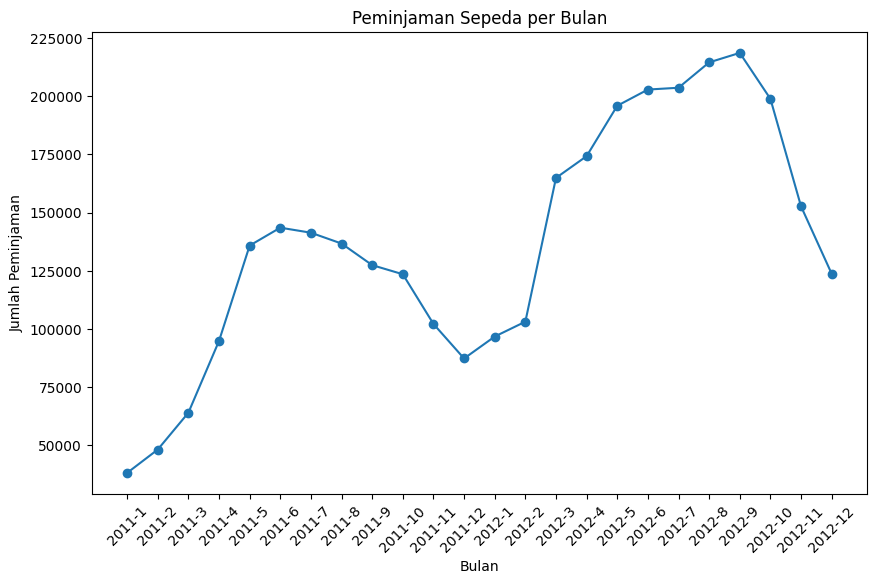

In [34]:
allbike_df['month'] = allbike_df['dteday'].dt.month
allbike_df['year'] = allbike_df['dteday'].dt.year

grouped_df = allbike_df.groupby(by=['year', 'month']).agg({
    'instant': 'nunique',
    'cnt_y': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(grouped_df['year'].astype(str) + '-' + grouped_df['month'].astype(str), grouped_df['cnt_y'], marker='o', linestyle='-')
plt.title('Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam penggunaan sepeda antara musim-musim tertentu?

Melakukan operasi grup pada DataFrame allbike_df berdasarkan kolom 'season' dan menghitung jumlah total peminjaman sepeda untuk setiap musim.

In [35]:
grouped_df = allbike_df.groupby(by=['season']).agg({
    'cnt_y': 'sum'
}).reset_index()

grouped_df = grouped_df.rename(columns={'season':'Musim', 'cnt': 'Total pinjam sepeda'})
grouped_df

,Musim,cnt_y
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


Membuat bar plot untuk memvisualisasikan perbedaan total peminjaman sepeda antar musim.

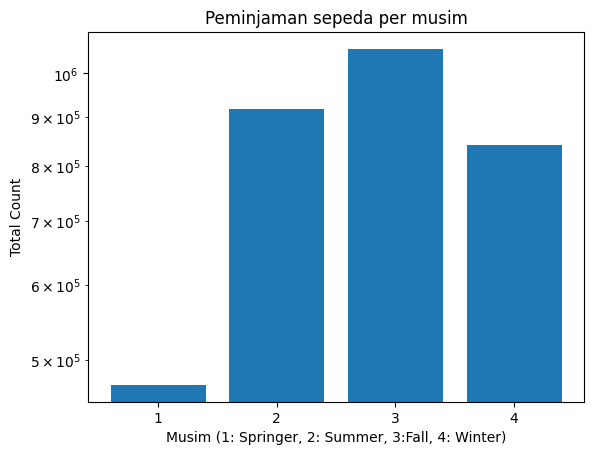

In [36]:
grouped_df = allbike_df.groupby(by="season").agg({
    "cnt_y": "sum"
}).reset_index()

plt.bar(grouped_df['season'].astype(str), grouped_df['cnt_y'])
plt.title('Peminjaman sepeda per musim')
plt.yscale('log')
plt.xlabel('Musim (1: Springer, 2: Summer, 3:Fall, 4: Winter)')
plt.ylabel('Total Count')
plt.show()

### Pertanyaan 3: Bagaimana penggunaan sepeda berkorelasi dengan suhu atau kelembaban tertentu?

Menghitung korelasi antara kolom 'hr' (waktu peminjaman sepeda) dengan kolom 'temp_y' (suhu) dan 'hum_y' (kelembaban) dalam DataFrame allbike_df.

In [37]:
corr_temp = allbike_df['hr'].corr(allbike_df['temp_y'])
corr_hum = allbike_df['hr'].corr(allbike_df['hum_y'])

print(f"Korelasi antara waktu peminjaman sepeda dan suhu: {corr_temp}")
print(f"Korelasi antara waktu peminjaman sepeda dan kelembaban: {corr_hum}")

Korelasi antara waktu peminjaman sepeda dan suhu: 0.13760349386561088
Korelasi antara waktu peminjaman sepeda dan kelembaban: -0.2764978279048553


Membuat scatter plot untuk memvisualisasikan korelasi waktu penggunaan sepeda dengan suhu dan kelembaban.

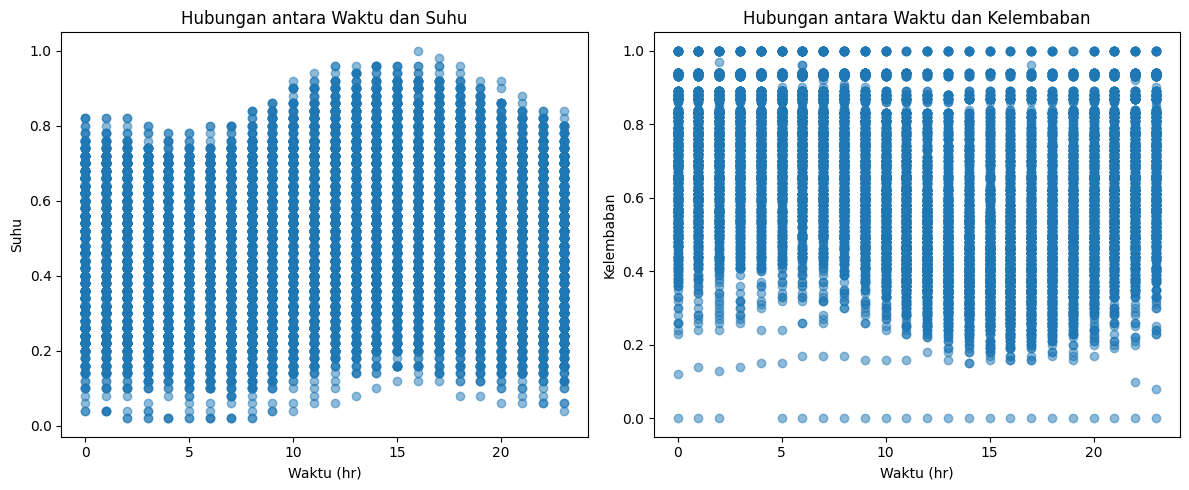

Korelasi antara waktu peminjaman sepeda dan suhu: 0.13760349386561088
Korelasi antara waktu peminjaman sepeda dan kelembaban: -0.2764978279048553


In [38]:
corr_temp = allbike_df['hr'].corr(allbike_df['temp_y'])
corr_hum = allbike_df['hr'].corr(allbike_df['hum_y'])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(allbike_df['hr'], allbike_df['temp_y'], alpha=0.5)
plt.title('Hubungan antara Waktu dan Suhu')
plt.xlabel('Waktu (hr)')
plt.ylabel('Suhu')

plt.subplot(1, 2, 2)
plt.scatter(allbike_df['hr'], allbike_df['hum_y'], alpha=0.5)
plt.title('Hubungan antara Waktu dan Kelembaban')
plt.xlabel('Waktu (hr)')
plt.ylabel('Kelembaban')

plt.tight_layout()
plt.show()

print(f"Korelasi antara waktu peminjaman sepeda dan suhu: {corr_temp}")
print(f"Korelasi antara waktu peminjaman sepeda dan kelembaban: {corr_hum}")


## Conclusion

Pertanyaan 1:
- Terlihat peningkatan jumlah peminjaman sepeda dari tahun 2011 ke tahun 2012. Hal ini menunjukkan adanya pertumbuhan penggunaan sepeda selama dua tahun tersebut.
- Jumlah peminjaman sepeda terbanyak, terjadi pada bulan September 2012.

Pertanyaan 2:
- Grafik menunjukkan fluktuasi dalam peminjaman sepeda dari musim ke musim. Musim gugur merupakan musim yang memiliki peminjaman yang paling tinggi, ini menunjukkan adanya faktor musiman yang memengaruhi keputusan orang untuk meminjam sepeda.

Pertanyaan 3:
- Korelasi antara waktu peminjaman sepeda dan suhu adalah 0.13760349386561088. Hal ini menunjukkan bahwa terdapat hubungan linier positif antara waktu peminjaman sepeda dan suhu, tetapi hubungan tersebut lemah.
- Korelasi antara waktu peminjaman sepeda dan kelembaban adalah -0.2764978279048553. Hal ini menunjukkan bahwa ada hubungan linier negatif antara waktu peminjaman sepeda dan kelembaban tersebut, tetapi hubungan tersebut juga lemah.